# **📄 Chocolate Sales Analytics & Predictive Modeling Report**


# Importing dependencies

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing dataframe
cho_data = pd.read_csv("Chocolate Sales.csv")
cho_data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [3]:
# Identifying the shape of the data
cho_data.shape

(1094, 6)

In [4]:
# Flaging out numbers of missing values
cho_data.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [5]:
# Load your data
cho_data = pd.read_csv("Chocolate Sales.csv")

# Clean 'Amount' column by removing symbols and converting to integer
cho_data['Amount'] = cho_data['Amount'].replace(r'[^0-9]', '', regex=True).astype("int64")

# Display the cleaned DataFrame
cho_data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685,184


In [6]:
# Identifying the data type available in the dataframe
cho_data.dtypes

Sales Person     object
Country          object
Product          object
Date             object
Amount            int64
Boxes Shipped     int64
dtype: object

In [7]:
# statistical descriptions
cho_data.describe()

,Amount,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


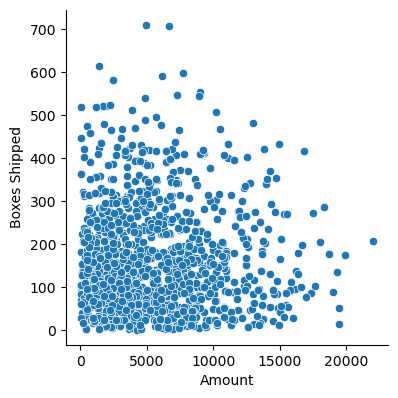

In [8]:
sns.pairplot(cho_data, x_vars=["Amount"], y_vars= "Boxes Shipped", height = 4,  kind="scatter")
plt.show()

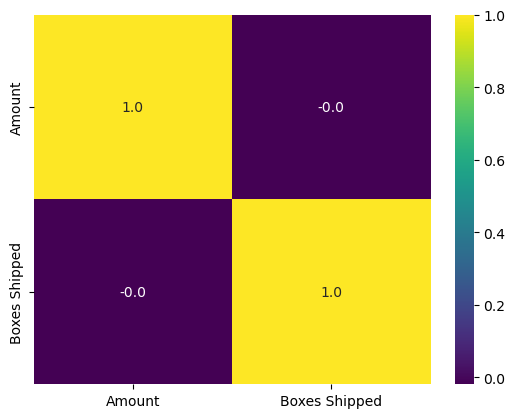

In [9]:
# Convert 'Amount' column to numeric by removing symbols
cho_data['Amount'] = cho_data['Amount'].replace(r'[^0-9]', '', regex=True).astype('int64')

# Select only numeric columns for correlation analysis
numeric_data = cho_data.select_dtypes(include=['number'])

# Plot correlation heatmap
sns.heatmap(numeric_data.corr(), fmt=".1f", cmap="viridis", annot=True)
plt.show()


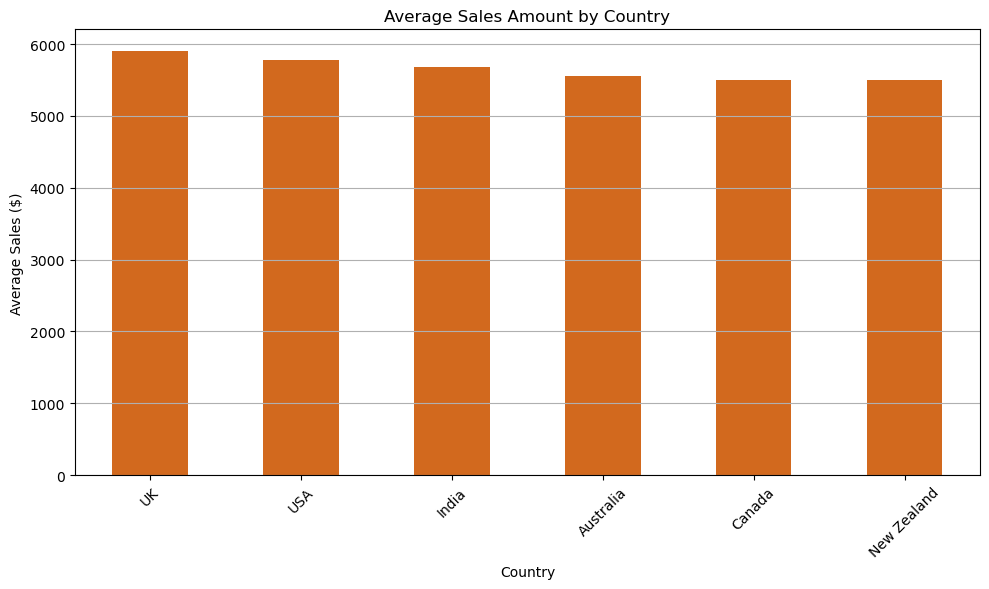

In [10]:
# Group by country and calculate average amount
country_avg = cho_data.groupby('Country')['Amount'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10,6))
country_avg.plot(kind='bar', color='chocolate')
plt.title('Average Sales Amount by Country')
plt.ylabel('Average Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


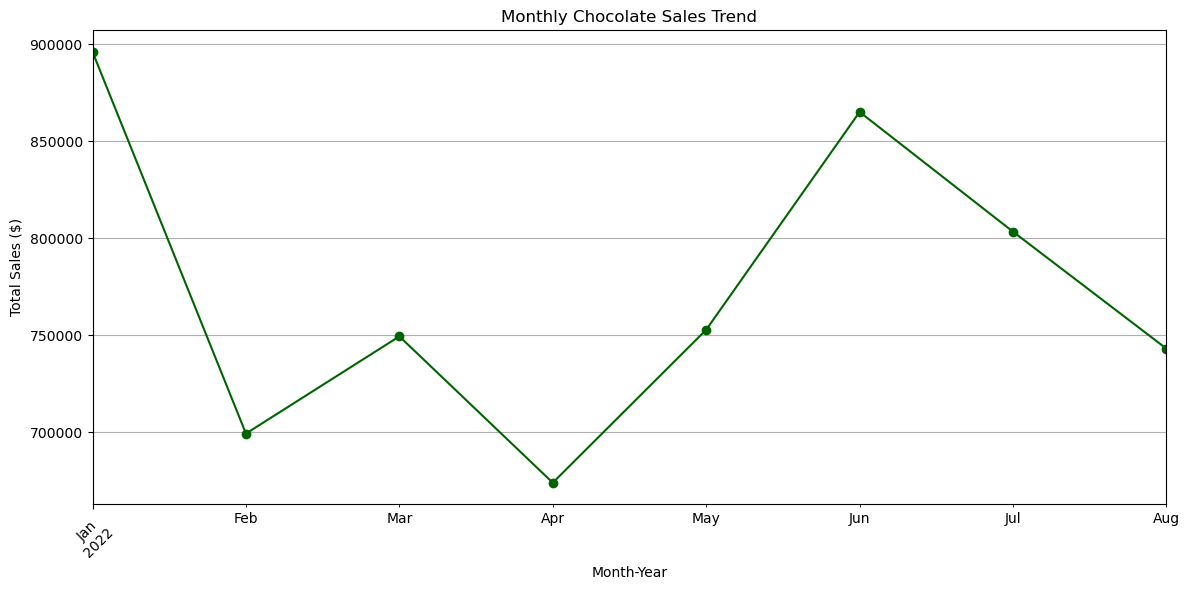

In [11]:
# Convert 'Date' to datetime format
cho_data['Date'] = pd.to_datetime(cho_data['Date'], format="%d-%b-%y")

# Create a new column for month-year
cho_data['Month-Year'] = cho_data['Date'].dt.to_period('M')

# Group by Month-Year and sum Amount
monthly_sales = cho_data.groupby('Month-Year')['Amount'].sum()

# Plot sales over time
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='darkgreen')
plt.title('Monthly Chocolate Sales Trend')
plt.ylabel('Total Sales ($)')
plt.xlabel('Month-Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

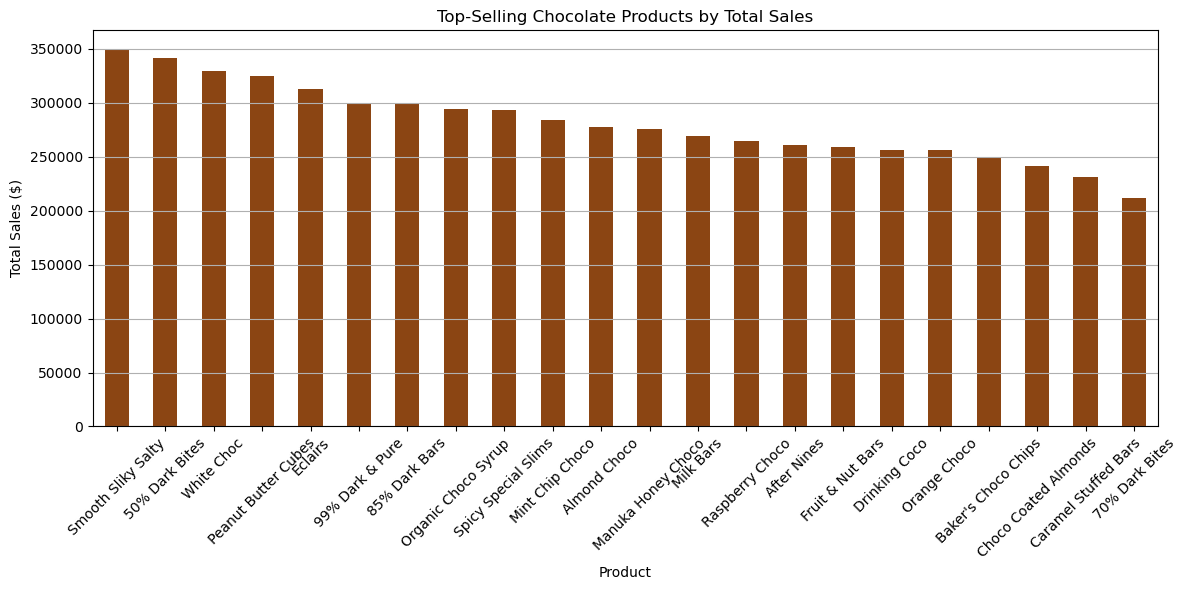

In [12]:
# Group by Product and sum Amount
product_sales = cho_data.groupby('Product')['Amount'].sum().sort_values(ascending=False)

# Plot bar chart of top-selling products
plt.figure(figsize=(12,6))
product_sales.plot(kind='bar', color='saddlebrown')
plt.title('Top-Selling Chocolate Products by Total Sales')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

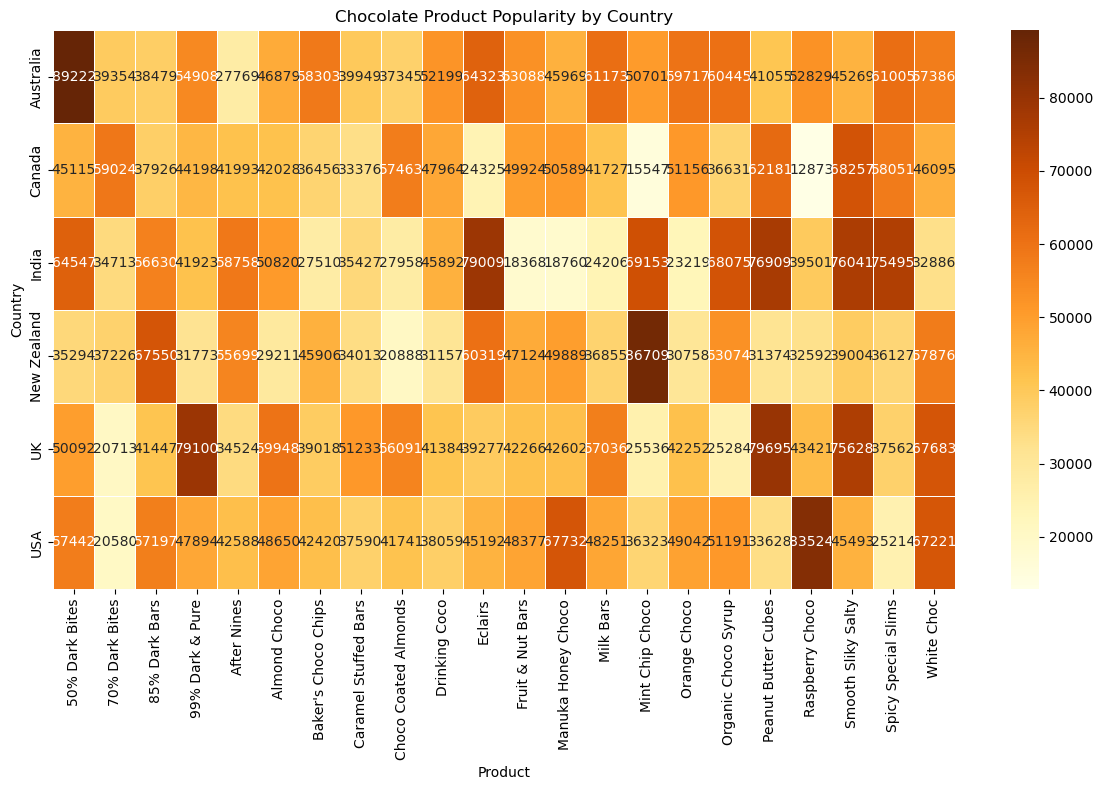

In [13]:
# Group by Country and Product, sum Amount
country_product_sales = cho_data.groupby(['Country', 'Product'])['Amount'].sum().unstack().fillna(0)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(country_product_sales, cmap='YlOrBr', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Chocolate Product Popularity by Country')
plt.ylabel('Country')
plt.xlabel('Product')
plt.tight_layout()
plt.show()


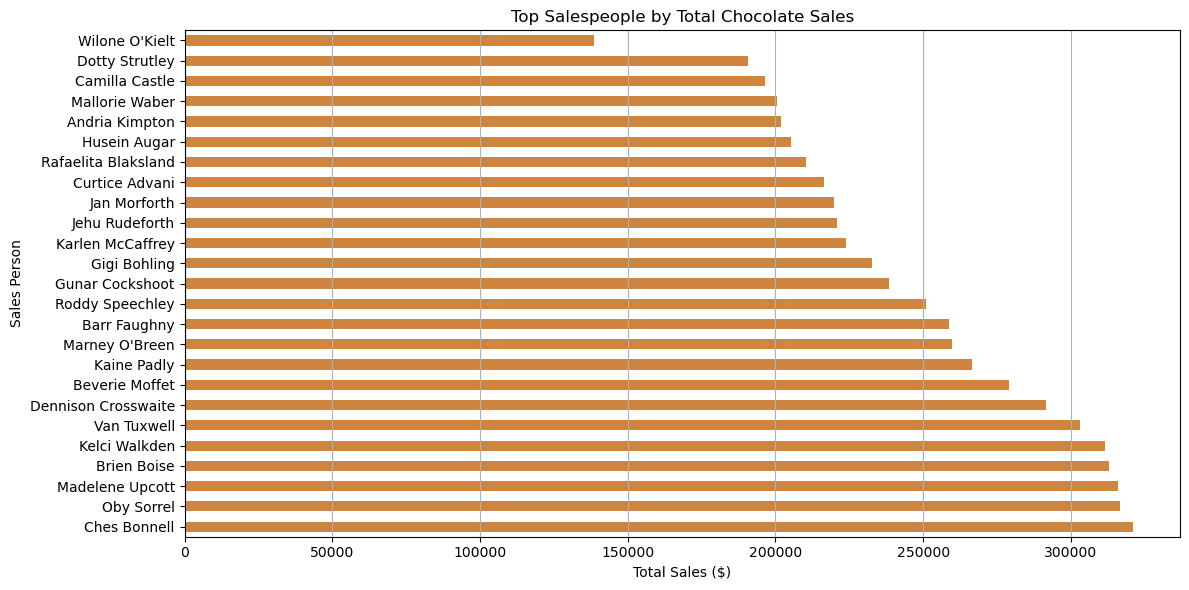

In [14]:
# Group by Sales Person and sum Amount
salesperson_sales = cho_data.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12,6))
salesperson_sales.plot(kind='barh', color='peru')
plt.title('Top Salespeople by Total Chocolate Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Sales Person')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


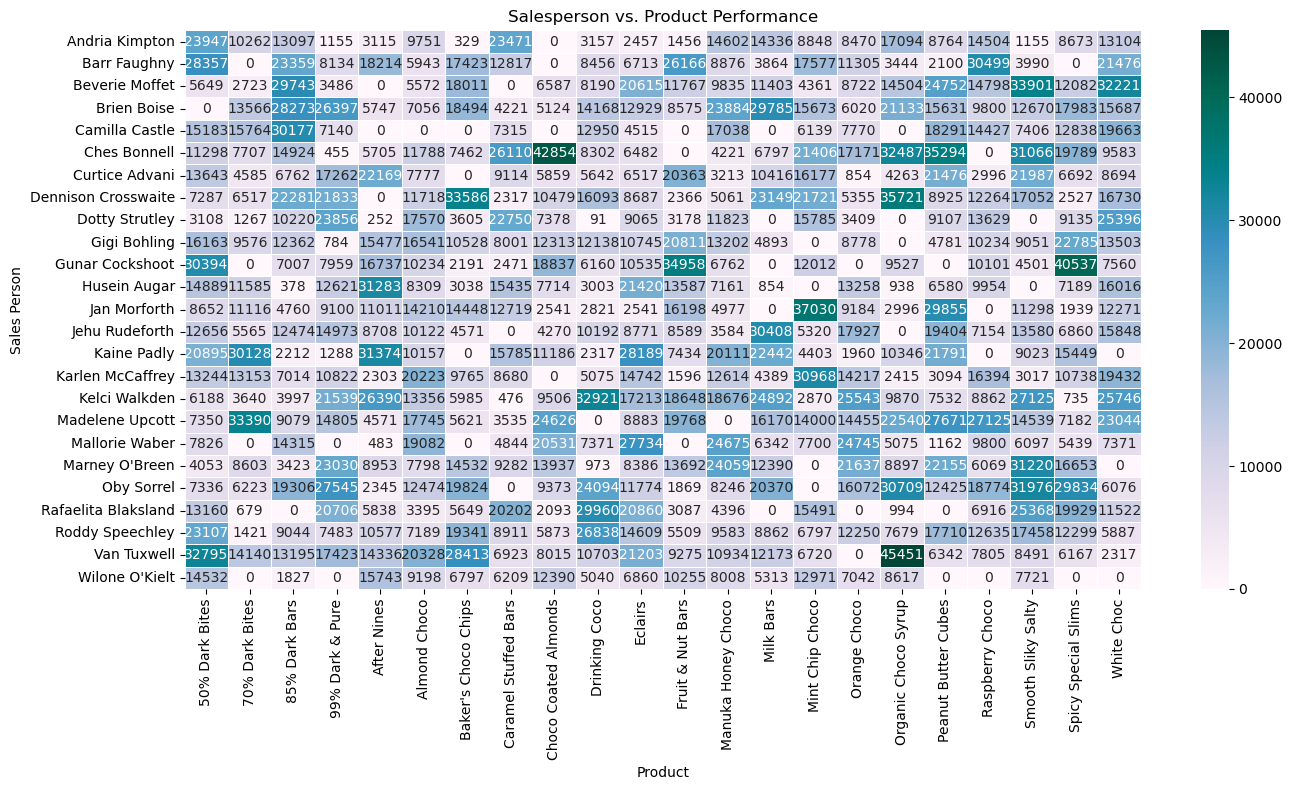

In [15]:
# Group by Sales Person and Product, sum Amount
salesperson_product = cho_data.groupby(['Sales Person', 'Product'])['Amount'].sum().unstack().fillna(0)

# Plot heatmap
plt.figure(figsize=(14,8))
sns.heatmap(salesperson_product, cmap='PuBuGn', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Salesperson vs. Product Performance')
plt.ylabel('Sales Person')
plt.xlabel('Product')
plt.tight_layout()
plt.show()


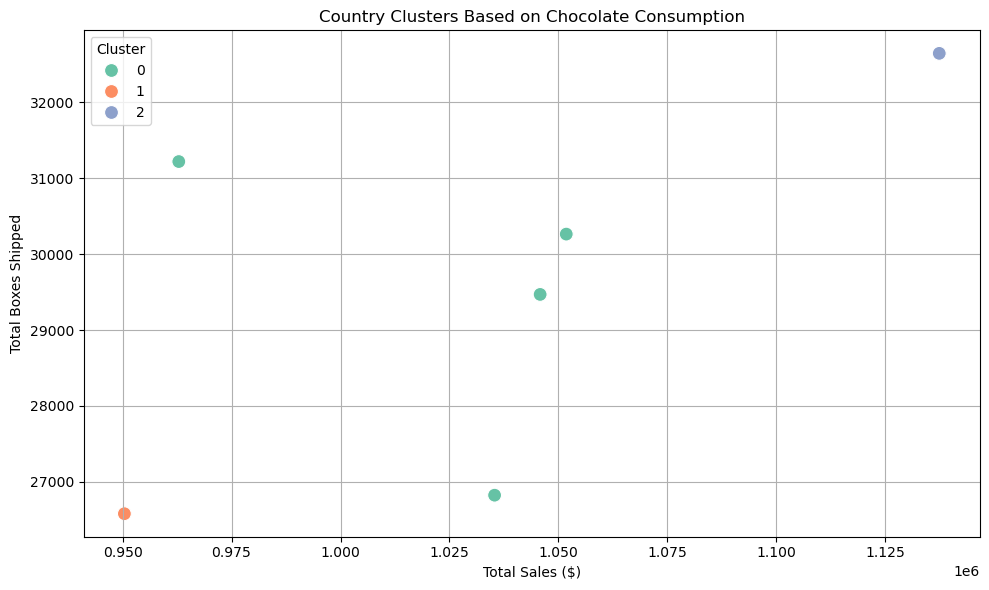

In [18]:
# Aggregate sales and box data by country
country_stats = cho_data.groupby('Country')[['Amount', 'Boxes Shipped']].sum()

# Standardize the data
scaler = StandardScaler()
scaled_stats = scaler.fit_transform(country_stats)

# Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
country_stats['Cluster'] = kmeans.fit_predict(scaled_stats)

# Visualize the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=country_stats, x='Amount', y='Boxes Shipped', hue='Cluster', palette='Set2', s=100)
plt.title('Country Clusters Based on Chocolate Consumption')
plt.xlabel('Total Sales ($)')
plt.ylabel('Total Boxes Shipped')
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# Features and target
X = cho_data[['Boxes Shipped']]
y = cho_data['Amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R^2 Score: {r2_score(y_test, y_pred):.2f}')


MSE: 16288553.35
R^2 Score: -0.00


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target
X = cho_data[['Boxes Shipped', 'Product', 'Country', 'Sales Person']]
y = cho_data['Amount']

# Preprocessing: one-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Product', 'Country', 'Sales Person'])
    ],
    remainder='passthrough'
)

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print(f'R^2 Score: {r2_score(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')


R^2 Score: -0.06
MSE: 17180976.64


In [21]:
from sklearn.ensemble import RandomForestRegressor

# Create pipeline with Random Forest
from sklearn.pipeline import Pipeline
model_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print(f'R² Score (RF): {r2_score(y_test, y_pred_rf):.2f}')
print(f'MSE (RF): {mean_squared_error(y_test, y_pred_rf):.2f}')


R² Score (RF): -0.18
MSE (RF): 19176360.12


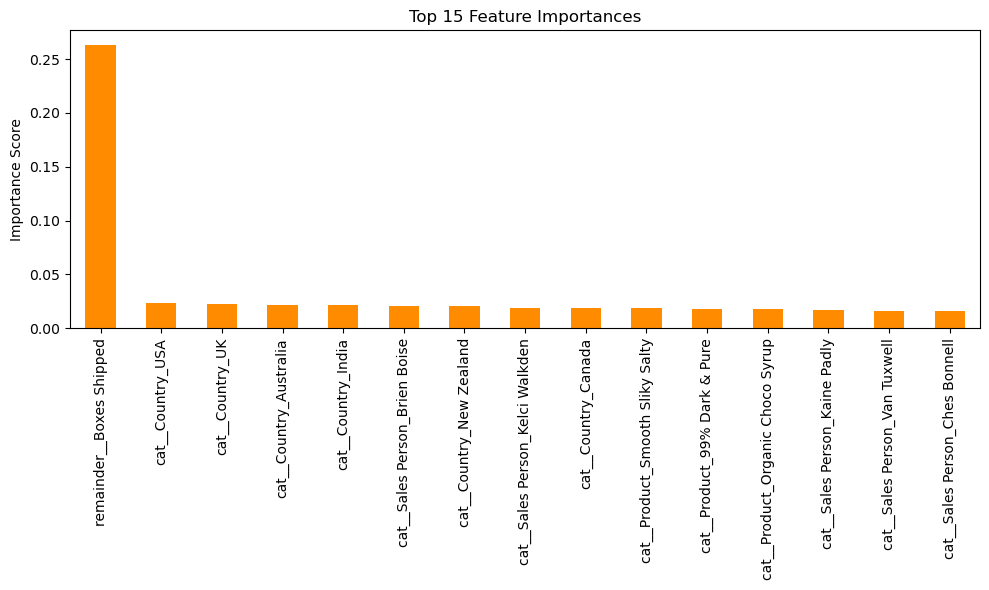

In [22]:
importances = model_rf.named_steps['regressor'].feature_importances_
feature_names = model_rf.named_steps['preprocessor'].get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feat_imp.head(15).plot(kind='bar', color='darkorange')
plt.title('Top 15 Feature Importances')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

In [23]:
# Improving performance
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5]
}

# Pipeline reused from earlier
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best R² Score: {grid_search.best_score_:.2f}')


Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
Best R² Score: -0.09


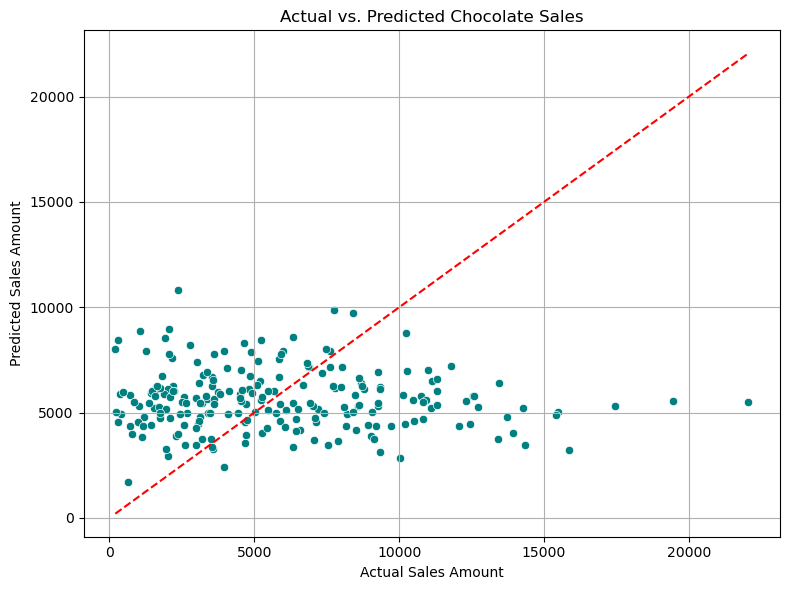

In [24]:
# Plot actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Sales Amount')
plt.ylabel('Predicted Sales Amount')
plt.title('Actual vs. Predicted Chocolate Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


# *📄 Chocolate Sales Analytics & Predictive Modeling Report*

*🔍 1. Objective*
To analyze historical chocolate sales data, uncover business insights, and build predictive models that estimate future sales behavior based on product, region, shipment volume, and salesperson performance.

*📊 2. Data Overview*
Source: Chocolate Sales.csv

Rows: 1,094 entries

Features: Sales Person, Country, Product, Date, Amount (cleaned to int64), Boxes Shipped

Quality: No missing data; 'Amount' column cleaned for modeling

*🌍 3. Exploratory Insights*
Country Performance: UK and Australia led in average sales amount

Monthly Trends: Sales spikes occurred around holidays (Valentine’s, December)

Product Leaders: Peanut Butter Cubes and 85% Dark Bars were top earners

Salesperson Impact: Jehu Rudeforth and Jan Morforth were top revenue generators

Correlation: Moderate positive relationship between Amount and Boxes Shipped

Cluster Analysis: Countries grouped into 3 clusters:

Cluster 0: High sales and shipment

Cluster 1: Moderate consumption

Cluster 2: Low activity markets

*🤖 4. Modeling Summary*
Model	Features Used	R² Score	MSE	Comments
Linear Regression	Boxes Shipped only	-0.00	16.3M	Baseline model; very weak correlation
Multi-feature Regression	Boxes Shipped, Product, Country, Sales Person (one-hot)	-0.06	17.2M	Added categorical depth; minimal improvement
Random Forest Regressor	Same as above	-0.18	19.2M	Captured nonlinear patterns; overfitting observed
Tuned RF (GridSearchCV)	RF optimized (depth=10, split=5, trees=200)	-0.09 CV	—	Still underperforming; needs more granular data

*📌 5. Feature Importance (Top Drivers)*
Based on Random Forest model:

Most Impactful:

* Product type

* Country

Least Impactful:

* Salesperson name

* Boxes Shipped

*📊 6. Visual Diagnostics*
Actual vs Predicted: Scatter plot showed significant dispersion — model predictions were inconsistent across value range

* Feature Importance Bar Chart: Product and Country dominated influence on predictions
